In [1]:
import warnings
warnings.filterwarnings('ignore')

# Ajout des librairies

In [2]:
import pandas as pd
import numpy as np

import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import cluster, metrics

from gensim.models import Word2Vec

from transformers import BertTokenizer, BertModel
import torch
from transformers import DistilBertModel, DistilBertTokenizer


import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import linear_sum_assignment

import gensim
import gensim.downloader as api

from transformers import BertTokenizer, BertModel

import torch

import tensorflow as tf
import tensorflow_hub as hub

from tqdm import tqdm
from collections import Counter

## Téléchargement des ressources NLTK

In [3]:
# Télécharger les ressources nécessaires de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sebastienmorichon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebastienmorichon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastienmorichon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Chargement des données

In [4]:
# Charger les données
data = pd.read_csv("Flipkart/flipkart_com-ecommerce_sample_1050.csv", sep=",")
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [5]:
# Seletion des données que l'on souhaite utiliser 
data = data[["uniq_id","product_name","description","product_category_tree"]]
data

,uniq_id,product_name,description,product_category_tree
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,"[""Home Furnishing >> Curtains & Accessories >>..."
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."


# Nettoyage et préparation des données

## Récupération de la catégorie et 1er sous catégorie

In [6]:
# Split des données pour obtenir les catégories et sous-catégorie par colonne
data["product_category_tree"].replace(to_replace=r'[\["\]]', value="", regex=True, inplace=True)

In [7]:
# Split des données en fonction du caractère >>
category = data["product_category_tree"].str.split(" >> ", expand=True)
category

,0,1,2,3,4,5,6
0,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet ...,None,None,None
1,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...",None,None
2,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE ...,None,None
3,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King size...,None,None
4,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double B...,None,None
...,...,...,...,...,...,...,...
1045,Baby Care,Baby & Kids Gifts,Stickers,Oren Empower Stickers,None,None,None
1046,Baby Care,Baby & Kids Gifts,Stickers,Wallmantra Stickers,None,None,None
1047,Baby Care,Baby & Kids Gifts,Stickers,Uberlyfe Stickers,None,None,None
1048,Baby Care,Baby & Kids Gifts,Stickers,Wallmantra Stickers,None,None,None


In [8]:
#Boucle pour appliquer notre transformation à chacune des entrées
for i in category.columns:
    category.rename(columns={i:f"Sous-categorie {i}"}, inplace=True)

In [9]:
# On renome la catégorie principale
category.rename(columns={"Sous-categorie 0": "Categorie"}, inplace=True)
category

,Categorie,Sous-categorie 1,Sous-categorie 2,Sous-categorie 3,Sous-categorie 4,Sous-categorie 5,Sous-categorie 6
0,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet ...,None,None,None
1,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...",None,None
2,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE ...,None,None
3,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King size...,None,None
4,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double B...,None,None
...,...,...,...,...,...,...,...
1045,Baby Care,Baby & Kids Gifts,Stickers,Oren Empower Stickers,None,None,None
1046,Baby Care,Baby & Kids Gifts,Stickers,Wallmantra Stickers,None,None,None
1047,Baby Care,Baby & Kids Gifts,Stickers,Uberlyfe Stickers,None,None,None
1048,Baby Care,Baby & Kids Gifts,Stickers,Wallmantra Stickers,None,None,None


In [10]:
# On ajoute à notre table de base la catégorie principale avec la sous-catégorie
data = data.merge(category[["Categorie"]], how="inner", on=category.index)

In [11]:
data.head()

,key_0,uniq_id,product_name,description,product_category_tree,Categorie
0,0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing >> Curtains & Accessories >> C...,Home Furnishing
1,1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care >> Baby Bath & Skin >> Baby Bath Tow...,Baby Care
2,2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care >> Baby Bath & Skin >> Baby Bath Tow...,Baby Care
3,3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing >> Bed Linen >> Bedsheets >> S...,Home Furnishing
4,4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing >> Bed Linen >> Bedsheets >> J...,Home Furnishing


## Uniformisation des données

In [12]:
# Fonction de nettoyage des textes
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.strip() 
    return text

# Appliquer le nettoyage des textes
data['cleaned_description'] = data['description'].apply(clean_text)
data['cleaned_product_name'] = data['product_name'].apply(clean_text)

## Préparation des données

### Tokenisation

In [13]:
# Tokenisation
def tokenisation(column_name):
    data[f'tokenized_{column_name}'] = data[column_name].apply(word_tokenize)

tokenisation('cleaned_description')
tokenisation('cleaned_product_name')

In [14]:
data

,key_0,uniq_id,product_name,description,product_category_tree,Categorie,cleaned_description,cleaned_product_name,tokenized_cleaned_description,tokenized_cleaned_product_name
0,0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing >> Curtains & Accessories >> C...,Home Furnishing,key features of elegance polyester multicolor ...,elegance polyester multicolor abstract eyelet ...,"[key, features, of, elegance, polyester, multi...","[elegance, polyester, multicolor, abstract, ey..."
1,1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care >> Baby Bath & Skin >> Baby Bath Tow...,Baby Care,specifications of sathiyas cotton bath towel ...,sathiyas cotton bath towel,"[specifications, of, sathiyas, cotton, bath, t...","[sathiyas, cotton, bath, towel]"
2,2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care >> Baby Bath & Skin >> Baby Bath Tow...,Baby Care,key features of eurospa cotton terry face towe...,eurospa cotton terry face towel set,"[key, features, of, eurospa, cotton, terry, fa...","[eurospa, cotton, terry, face, towel, set]"
3,3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing >> Bed Linen >> Bedsheets >> S...,Home Furnishing,key features of santosh royal fashion cotton p...,santosh royal fashion cotton printed king size...,"[key, features, of, santosh, royal, fashion, c...","[santosh, royal, fashion, cotton, printed, kin..."
4,4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing >> Bed Linen >> Bedsheets >> J...,Home Furnishing,key features of jaipur print cotton floral kin...,jaipur print cotton floral king sized double b...,"[key, features, of, jaipur, print, cotton, flo...","[jaipur, print, cotton, floral, king, sized, d..."
...,...,...,...,...,...,...,...,...,...,...
1045,1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care >> Baby & Kids Gifts >> Stickers >> ...,Baby Care,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care >> Baby & Kids Gifts >> Stickers >> ...,Baby Care,wallmantra large vinyl sticker sticker pack of...,wallmantra large vinyl sticker sticker,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker]"
1047,1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care >> Baby & Kids Gifts >> Stickers >> ...,Baby Care,buy uberlyfe extra large pigmented polyvinyl f...,uberlyfe extra large pigmented polyvinyl films...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,..."
1048,1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care >> Baby & Kids Gifts >> Stickers >> ...,Baby Care,buy wallmantra medium vinyl sticker sticker fo...,wallmantra medium vinyl sticker sticker,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker]"


### Stop-Word

In [15]:
# Suppression des stop-words
def remove_stop_words(column_name):
    stop_words = set(stopwords.words('english'))
    data[column_name] = data[column_name].apply(lambda x: [word for word in x if word not in stop_words])

remove_stop_words("tokenized_cleaned_description")
remove_stop_words("tokenized_cleaned_product_name")

### Stemming

In [16]:
# Stemming
def stemming(column_name):
    stemmer = PorterStemmer()
    data[f'stemmed_{column_name}'] = data[column_name].apply(lambda x: [stemmer.stem(word) for word in x])

stemming('tokenized_cleaned_description')
stemming('tokenized_cleaned_product_name')

### Lemmatisation

In [17]:
# Lemmatisation
def lemmatisation(column_name):
    lemmatizer = WordNetLemmatizer()
    data[f'lemmatized_{column_name}'] = data[column_name].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

lemmatisation('tokenized_cleaned_description')
lemmatisation('tokenized_cleaned_product_name')

### Réunification des tokens

In [18]:
# Clean_descritpion
data['stemmed_tokenized_cleaned_description'] = data['stemmed_tokenized_cleaned_description'].apply(lambda x: ' '.join(x))
data['lemmatized_tokenized_cleaned_description'] = data['lemmatized_tokenized_cleaned_description'].apply(lambda x: ' '.join(x))

# Clean_product_name
data['stemmed_tokenized_cleaned_product_name'] = data['stemmed_tokenized_cleaned_product_name'].apply(lambda x: ' '.join(x))
data['lemmatized_tokenized_cleaned_product_name'] = data['lemmatized_tokenized_cleaned_product_name'].apply(lambda x: ' '.join(x))

### Fréquence des mots

#### Description

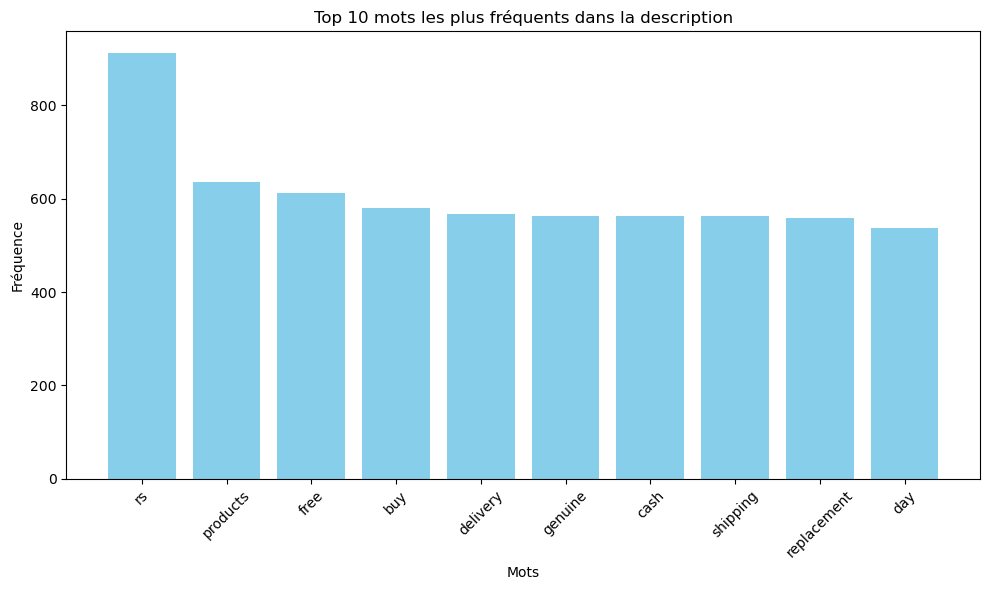

In [19]:
# Aplatir la liste des mots de toutes les lignes
all_words = [word for sublist in data['tokenized_cleaned_description'] for word in sublist]

# Compter la fréquence de chaque mot
word_counts = Counter(all_words)

# Convertir en DataFrame pour faciliter le traitement
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Trier par fréquence
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Visualiser les n mots les plus fréquents (par exemple, les 10 premiers)
top_n = 10
top_words = word_freq_df.head(top_n)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.bar(top_words['word'], top_words['count'], color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title(f'Top {top_n} mots les plus fréquents dans la description')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

#### Nom du produit

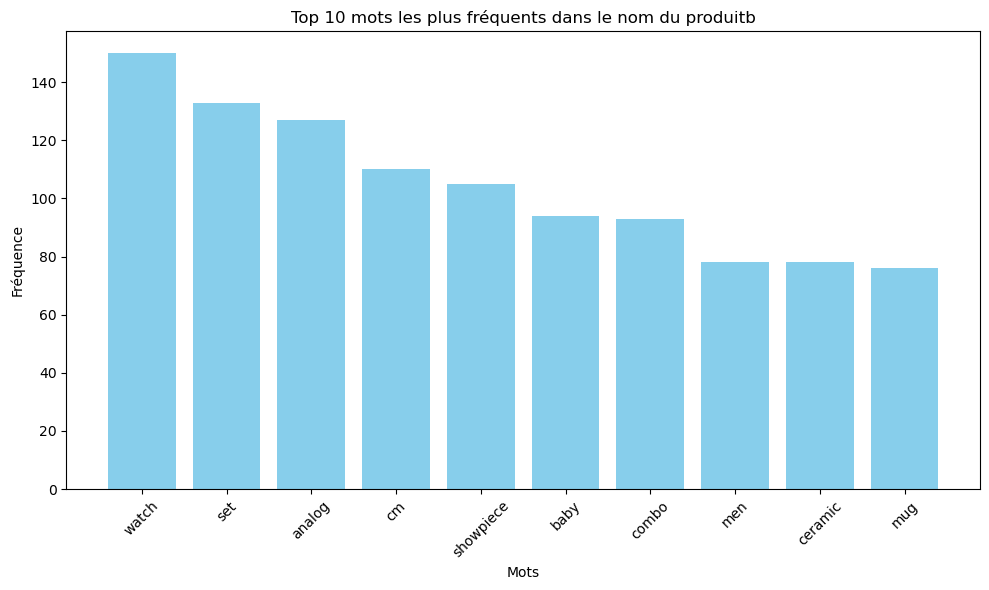

In [20]:
# Aplatir la liste des mots de toutes les lignes
all_words = [word for sublist in data['tokenized_cleaned_product_name'] for word in sublist]

# Compter la fréquence de chaque mot
word_counts = Counter(all_words)

# Convertir en DataFrame pour faciliter le traitement
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Trier par fréquence
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Visualiser les n mots les plus fréquents (par exemple, les 10 premiers)
top_n = 10
top_words = word_freq_df.head(top_n)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.bar(top_words['word'], top_words['count'], color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title(f'Top {top_n} mots les plus fréquents dans le nom du produitb')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Bag Of Words et TF-IDF

## Analyse de la description du produit 

### Séparation des données en Train et Test

In [21]:
# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    data['lemmatized_tokenized_cleaned_description'], 
    data['Categorie'], 
    test_size=0.3, 
    random_state=0
)

### Vectorisation

In [22]:
# Vectorisation avec Bag of Words
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

In [23]:
# Vectorisation avec TF-IDF
vectorizer_tfidf = TfidfVectorizer(min_df=0.1, max_df=0.85)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

### PCA

In [24]:
# PCA sur Bag of Words et TF-IDF
pca_bow = PCA(n_components=2).fit_transform(X_train_bow.toarray())
pca_tfidf = PCA(n_components=2).fit_transform(X_train_tfidf.toarray())

In [25]:
# On ajoute les résultats de la PCA au DataFrame pour la visualisation
data['pca1_bow'] = np.nan
data['pca2_bow'] = np.nan
data['pca1_tfidf'] = np.nan
data['pca2_tfidf'] = np.nan

In [26]:
data.loc[X_train.index, 'pca1_bow'] = pca_bow[:, 0]
data.loc[X_train.index, 'pca2_bow'] = pca_bow[:, 1]
data.loc[X_train.index, 'pca1_tfidf'] = pca_tfidf[:, 0]
data.loc[X_train.index, 'pca2_tfidf'] = pca_tfidf[:, 1]

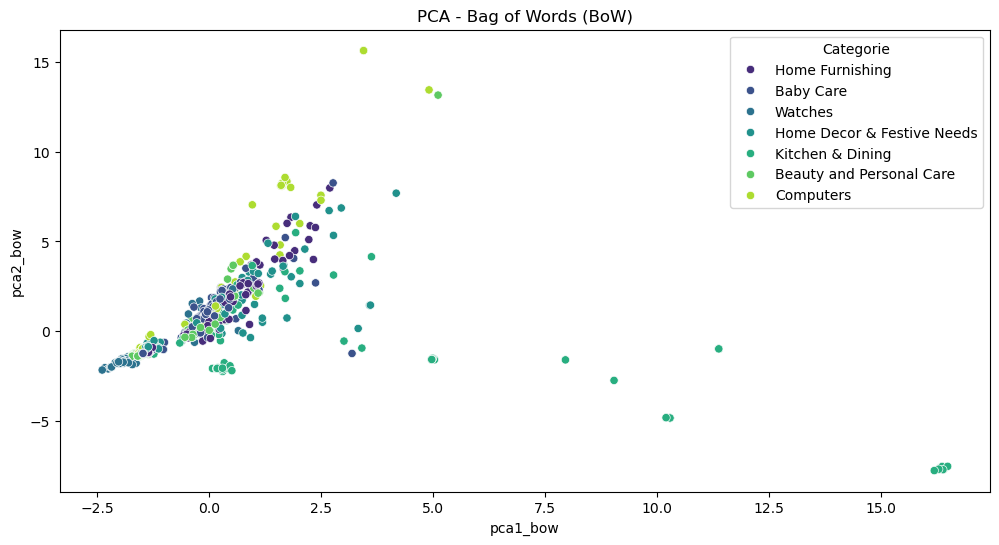

In [27]:
# Visualisation des résultats PCA avec Bag of Words
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1_bow', y='pca2_bow', hue='Categorie', data=data, palette='viridis')
plt.title('PCA - Bag of Words (BoW)')
plt.show()

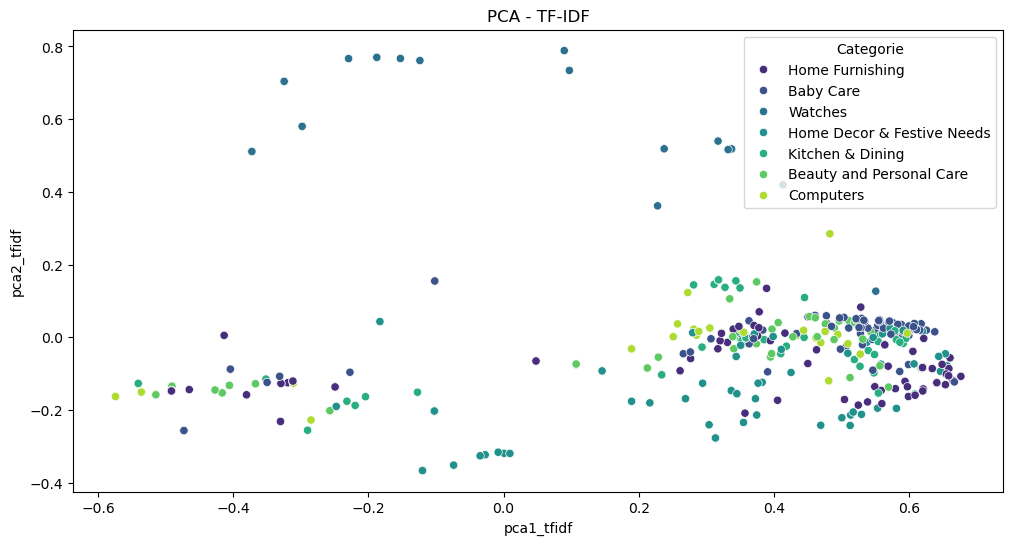

In [28]:
# Visualisation des résultats PCA avec TF-IDF
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1_tfidf', y='pca2_tfidf', hue='Categorie', data=data, palette='viridis')
plt.title('PCA - TF-IDF')
plt.show()

### TSNE

In [29]:
# t-SNE sur Bag of Words et TF-IDF
tsne_bow = TSNE(n_components=2, random_state=0, init="pca").fit_transform(X_train_bow.toarray())
tsne_tfidf = TSNE(n_components=2, random_state=0, init="pca").fit_transform(X_train_tfidf.toarray())

In [30]:
# Ajouter les résultats de la t-SNE au DataFrame pour visualiser avec Seaborn
data['tsne1_bow'] = np.nan
data['tsne2_bow'] = np.nan
data['tsne1_tfidf'] = np.nan
data['tsne2_tfidf'] = np.nan

In [31]:
data.loc[X_train.index, 'tsne1_bow'] = tsne_bow[:, 0]
data.loc[X_train.index, 'tsne2_bow'] = tsne_bow[:, 1]
data.loc[X_train.index, 'tsne1_tfidf'] = tsne_tfidf[:, 0]
data.loc[X_train.index, 'tsne2_tfidf'] = tsne_tfidf[:, 1]

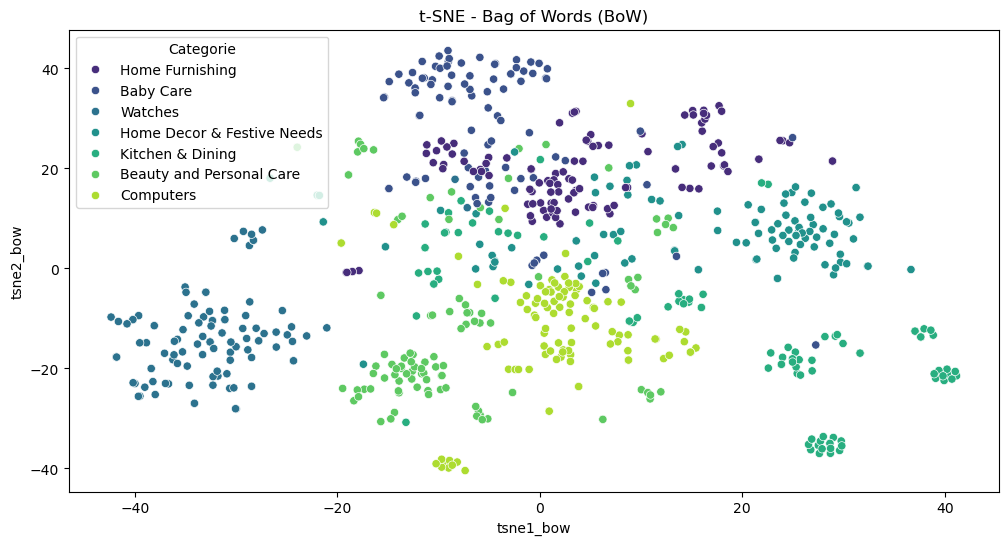

In [32]:
# Visualisation des résultats t-SNE avec Bag of Words
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tsne1_bow', y='tsne2_bow', hue='Categorie', data=data, palette='viridis')
plt.title('t-SNE - Bag of Words (BoW)')
plt.show()

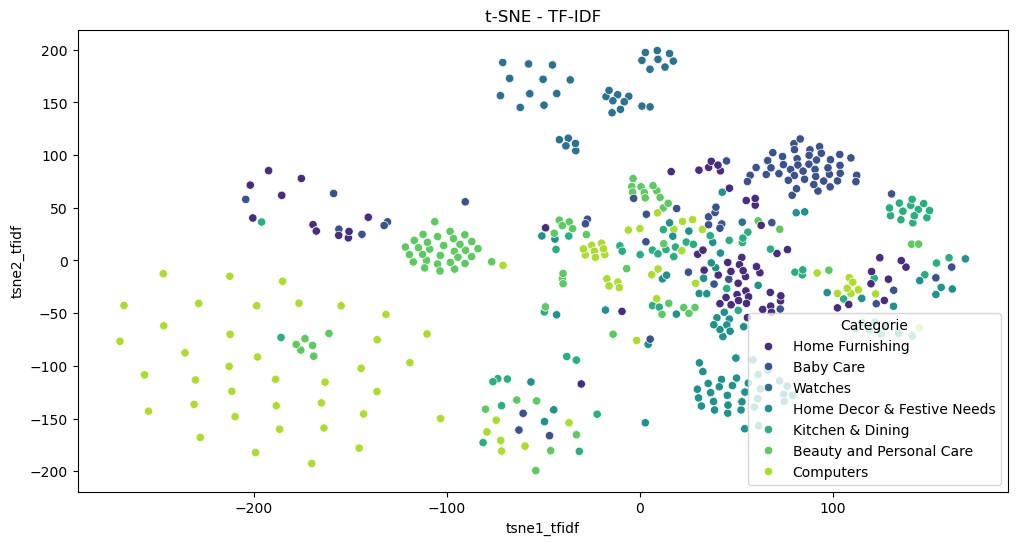

In [33]:
# Visualisation des résultats t-SNE avec TF-IDF
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tsne1_tfidf', y='tsne2_tfidf', hue='Categorie', data=data, palette='viridis')
plt.title('t-SNE - TF-IDF')
plt.show()

### KMEANS

#### Bags Of Words

In [34]:
# Modèle KMeans sur les données d'entraînement TF-IDF
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_train_bow)

KMeans(n_clusters=7, random_state=42)

In [35]:
# Prédictions avec KMeans sur le jeu de test
data['kmeans_labels'] = np.nan
data.loc[X_test.index, 'kmeans_labels'] = kmeans.predict(X_test_bow)

In [36]:
# Encodage des catégories réelles pour le calcul de l'ARI
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [37]:
# Calcul de l'ARI entre les labels KMeans et les catégories réelles
ari_test = adjusted_rand_score(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])
print("ARI sur l'ensemble de test avec la méthode du Bag Of Words:", ari_test)

ARI sur l'ensemble de test avec la méthode du Bag Of Words: 0.15546655175407925


#### Matrice de confusion Bag Of Words

Cluster to Label Mapping:  {2: 'Baby Care', 5: 'Beauty and Personal Care', 6: 'Computers', 0: 'Home Decor & Festive Needs', 3: 'Home Furnishing', 4: 'Kitchen & Dining', 1: 'Watches'}


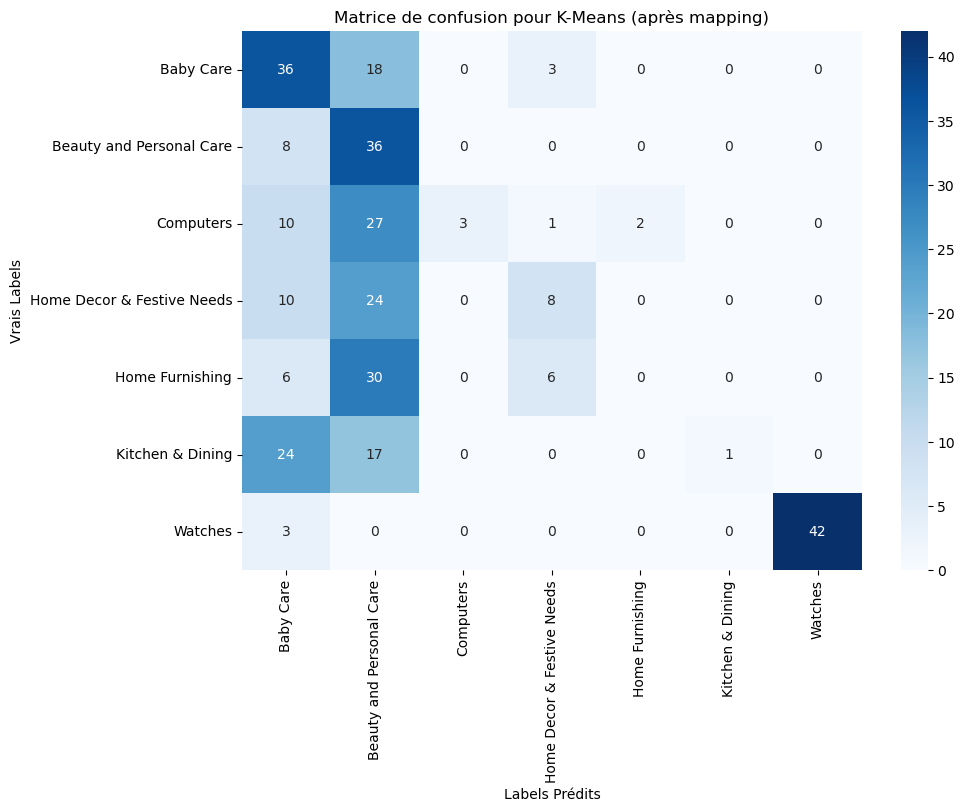

In [38]:
# Générer la matrice de confusion
conf_mat = confusion_matrix(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])

# Utiliser la méthode Hungarian algorithm pour trouver l'appariement optimal
# Inverser les valeurs car la méthode linear_sum_assignment minimise un coût (donc ici on veut maximiser les correspondances)
row_ind, col_ind = linear_sum_assignment(-conf_mat)

# Créer un mapping des clusters vers les vraies catégories
cluster_to_label = {cluster: label_encoder.inverse_transform([label])[0] for cluster, label in zip(col_ind, row_ind)}

print("Cluster to Label Mapping: ", cluster_to_label)

# Remplacer les labels KMeans par les vrais labels
data['kmeans_labels_mapped'] = data['kmeans_labels'].map(cluster_to_label)

# Convertir y_test_encoded en chaînes de caractères
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Générer la nouvelle matrice de confusion
new_conf_mat = confusion_matrix(y_test_labels, data.loc[X_test.index, 'kmeans_labels_mapped'])

# Visualisation de la matrice de confusion corrigée
plt.figure(figsize=(10, 7))
sns.heatmap(new_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion pour K-Means (après mapping)')
plt.xlabel('Labels Prédits')
plt.ylabel('Vrais Labels')
plt.show()



#### TF-IDF

In [39]:
# Modèle KMeans sur les données d'entraînement TF-IDF
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_train_tfidf)

KMeans(n_clusters=7, random_state=42)

In [40]:
# Prédictions avec KMeans sur le jeu de test
data['kmeans_labels'] = np.nan
data.loc[X_test.index, 'kmeans_labels'] = kmeans.predict(X_test_tfidf)

In [41]:
# Encodage des catégories réelles pour le calcul de l'ARI
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [42]:
# Calcul de l'ARI entre les labels KMeans et les catégories réelles
ari_test = adjusted_rand_score(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])
print("ARI sur l'ensemble de test avec la mathode TF-IDF :", ari_test)

ARI sur l'ensemble de test avec la mathode TF-IDF : 0.29061278548029035


#### Matrice de confusion TF IDF

Cluster to Label Mapping:  {2: 'Baby Care', 0: 'Beauty and Personal Care', 4: 'Computers', 5: 'Home Decor & Festive Needs', 1: 'Home Furnishing', 6: 'Kitchen & Dining', 3: 'Watches'}


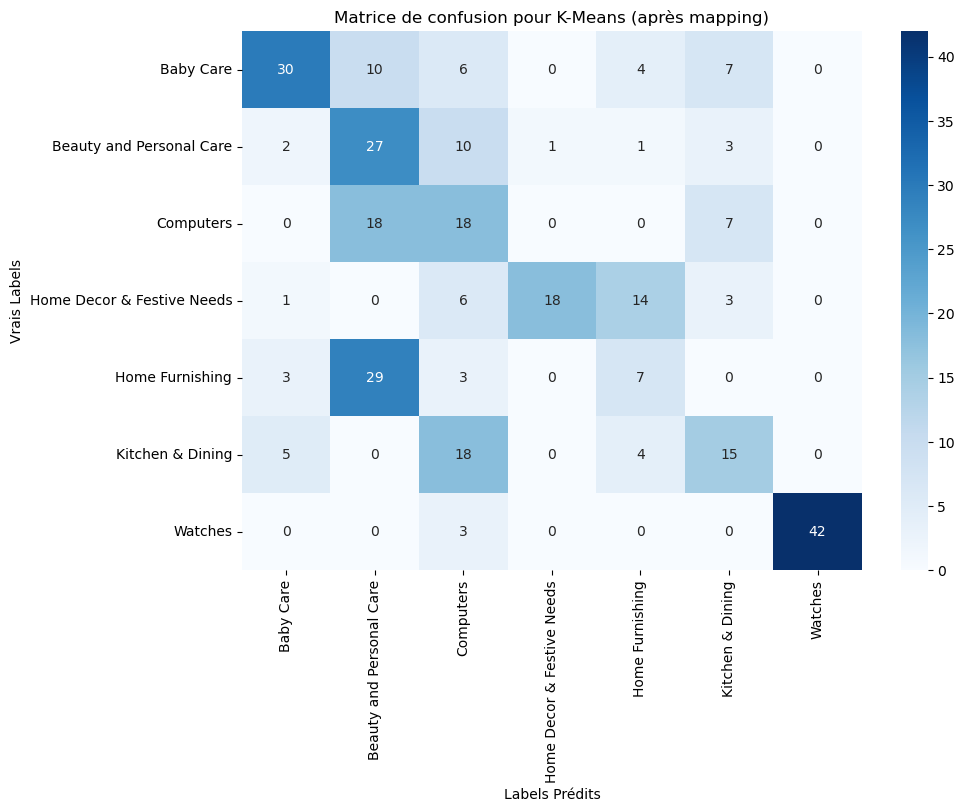

In [43]:
# Générer la matrice de confusion
conf_mat = confusion_matrix(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])

# Utiliser la méthode Hungarian algorithm pour trouver l'appariement optimal
# Inverser les valeurs car la méthode linear_sum_assignment minimise un coût (donc ici on veut maximiser les correspondances)
row_ind, col_ind = linear_sum_assignment(-conf_mat)

# Créer un mapping des clusters vers les vraies catégories
cluster_to_label = {cluster: label_encoder.inverse_transform([label])[0] for cluster, label in zip(col_ind, row_ind)}

print("Cluster to Label Mapping: ", cluster_to_label)

# Remplacer les labels KMeans par les vrais labels
data['kmeans_labels_mapped'] = data['kmeans_labels'].map(cluster_to_label)

# Convertir y_test_encoded en chaînes de caractères
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Générer la nouvelle matrice de confusion
new_conf_mat = confusion_matrix(y_test_labels, data.loc[X_test.index, 'kmeans_labels_mapped'])

# Visualisation de la matrice de confusion corrigée
plt.figure(figsize=(10, 7))
sns.heatmap(new_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion pour K-Means (après mapping)')
plt.xlabel('Labels Prédits')
plt.ylabel('Vrais Labels')
plt.show()

## Analyse du nom du produit 

### Séparation des données en Train et Test

In [44]:
# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    data['lemmatized_tokenized_cleaned_product_name'], 
    data['Categorie'], 
    test_size=0.3, 
    random_state=0
)

### Vectorisation

In [45]:
# Vectorisation avec Bag of Words
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

In [46]:
# Vectorisation avec TF-IDF
vectorizer_tfidf = TfidfVectorizer(min_df=0.1, max_df=0.85)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

### PCA

In [47]:
# PCA sur Bag of Words et TF-IDF
pca_bow = PCA(n_components=2).fit_transform(X_train_bow.toarray())
pca_tfidf = PCA(n_components=2).fit_transform(X_train_tfidf.toarray())

In [48]:
# On ajoute les résultats de la PCA au DataFrame pour la visualisation
data['pca1_bow'] = np.nan
data['pca2_bow'] = np.nan
data['pca1_tfidf'] = np.nan
data['pca2_tfidf'] = np.nan

In [49]:
data.loc[X_train.index, 'pca1_bow'] = pca_bow[:, 0]
data.loc[X_train.index, 'pca2_bow'] = pca_bow[:, 1]
data.loc[X_train.index, 'pca1_tfidf'] = pca_tfidf[:, 0]
data.loc[X_train.index, 'pca2_tfidf'] = pca_tfidf[:, 1]

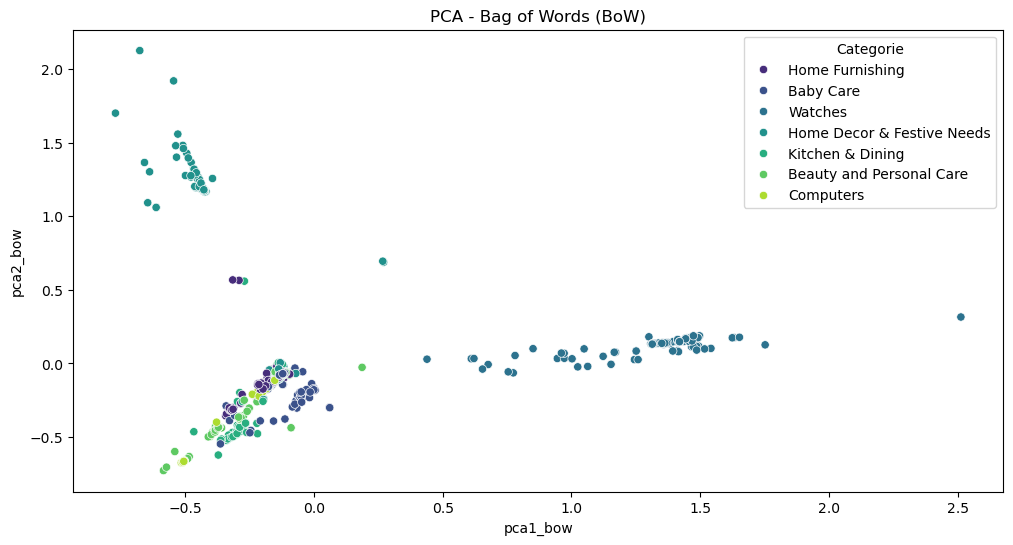

In [50]:
# Visualisation des résultats PCA avec Bag of Words
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1_bow', y='pca2_bow', hue='Categorie', data=data, palette='viridis')
plt.title('PCA - Bag of Words (BoW)')
plt.show()

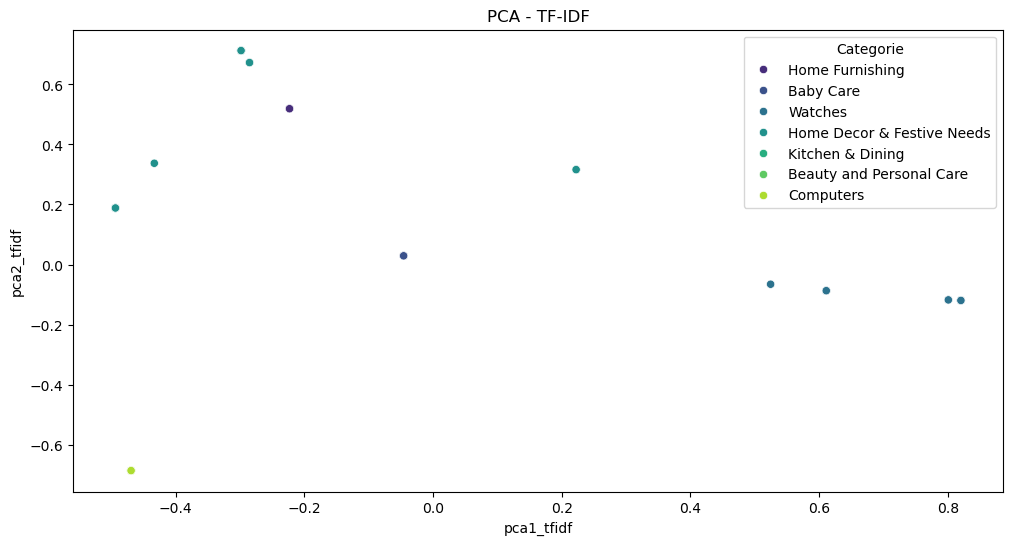

In [51]:
# Visualisation des résultats PCA avec TF-IDF
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1_tfidf', y='pca2_tfidf', hue='Categorie', data=data, palette='viridis')
plt.title('PCA - TF-IDF')
plt.show()

### TSNE

In [52]:
# t-SNE sur Bag of Words et TF-IDF
tsne_bow = TSNE(n_components=2, random_state=0, init="pca").fit_transform(X_train_bow.toarray())
tsne_tfidf = TSNE(n_components=2, random_state=0, init="pca").fit_transform(X_train_tfidf.toarray())

In [53]:
# Ajouter les résultats de la t-SNE au DataFrame pour visualiser avec Seaborn
data['tsne1_bow'] = np.nan
data['tsne2_bow'] = np.nan
data['tsne1_tfidf'] = np.nan
data['tsne2_tfidf'] = np.nan

In [54]:
data.loc[X_train.index, 'tsne1_bow'] = tsne_bow[:, 0]
data.loc[X_train.index, 'tsne2_bow'] = tsne_bow[:, 1]
data.loc[X_train.index, 'tsne1_tfidf'] = tsne_tfidf[:, 0]
data.loc[X_train.index, 'tsne2_tfidf'] = tsne_tfidf[:, 1]

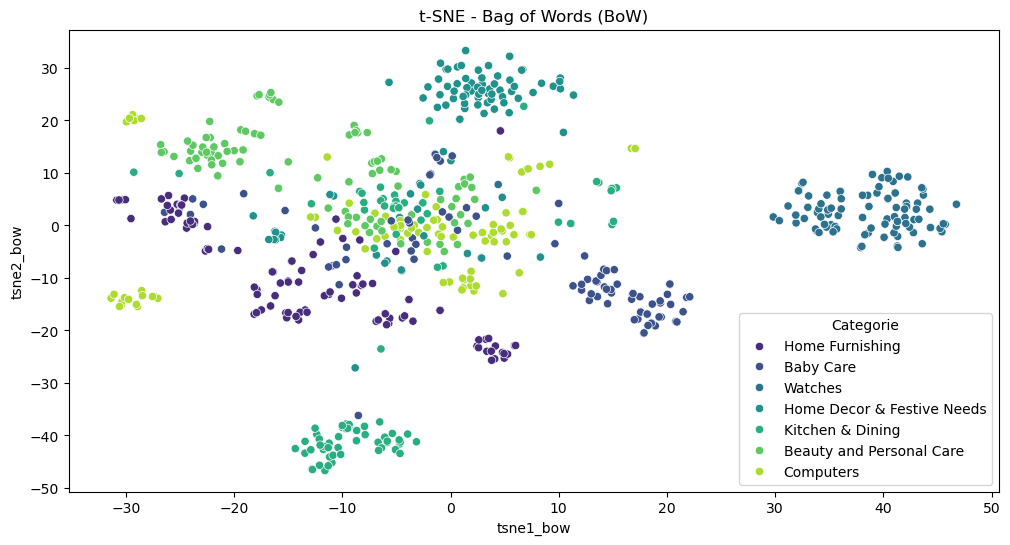

In [55]:
# Visualisation des résultats t-SNE avec Bag of Words
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tsne1_bow', y='tsne2_bow', hue='Categorie', data=data, palette='viridis')
plt.title('t-SNE - Bag of Words (BoW)')
plt.show()

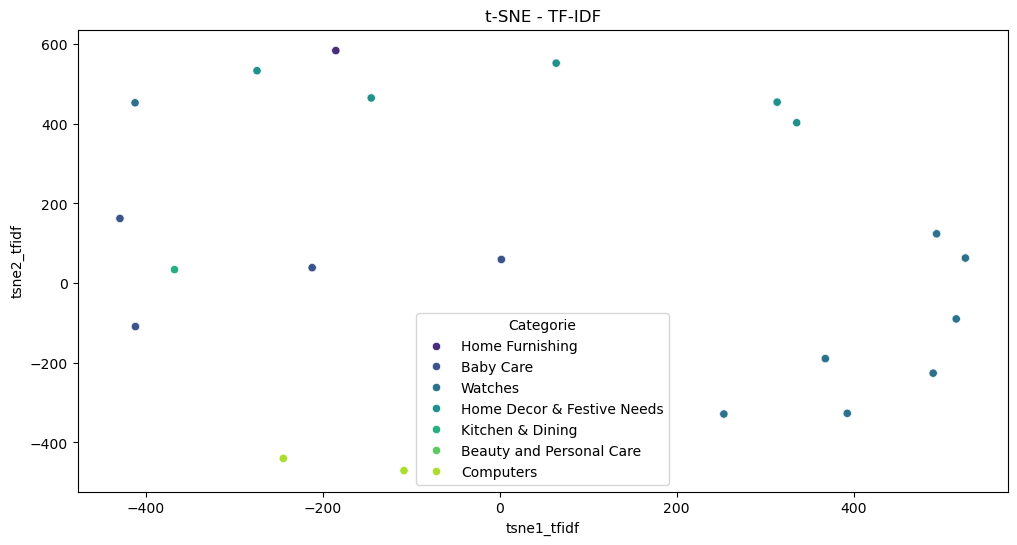

In [56]:
# Visualisation des résultats t-SNE avec TF-IDF
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tsne1_tfidf', y='tsne2_tfidf', hue='Categorie', data=data, palette='viridis')
plt.title('t-SNE - TF-IDF')
plt.show()

### KMEANS

#### Bags Of Words

In [57]:
# Modèle KMeans sur les données d'entraînement TF-IDF
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_train_bow)

KMeans(n_clusters=7, random_state=42)

In [58]:
# Prédictions avec KMeans sur le jeu de test
data['kmeans_labels'] = np.nan
data.loc[X_test.index, 'kmeans_labels'] = kmeans.predict(X_test_bow)

In [59]:
# Encodage des catégories réelles pour le calcul de l'ARI
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [60]:
# Calcul de l'ARI entre les labels KMeans et les catégories réelles
ari_test = adjusted_rand_score(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])
print("ARI sur l'ensemble de test avec la méthode du Bag Of Words:", ari_test)

ARI sur l'ensemble de test avec la méthode du Bag Of Words: 0.2948940931344876


#### Matrice de confusion Bag Of Words

Cluster to Label Mapping:  {2: 'Baby Care', 1: 'Beauty and Personal Care', 4: 'Computers', 6: 'Home Decor & Festive Needs', 3: 'Home Furnishing', 0: 'Kitchen & Dining', 5: 'Watches'}


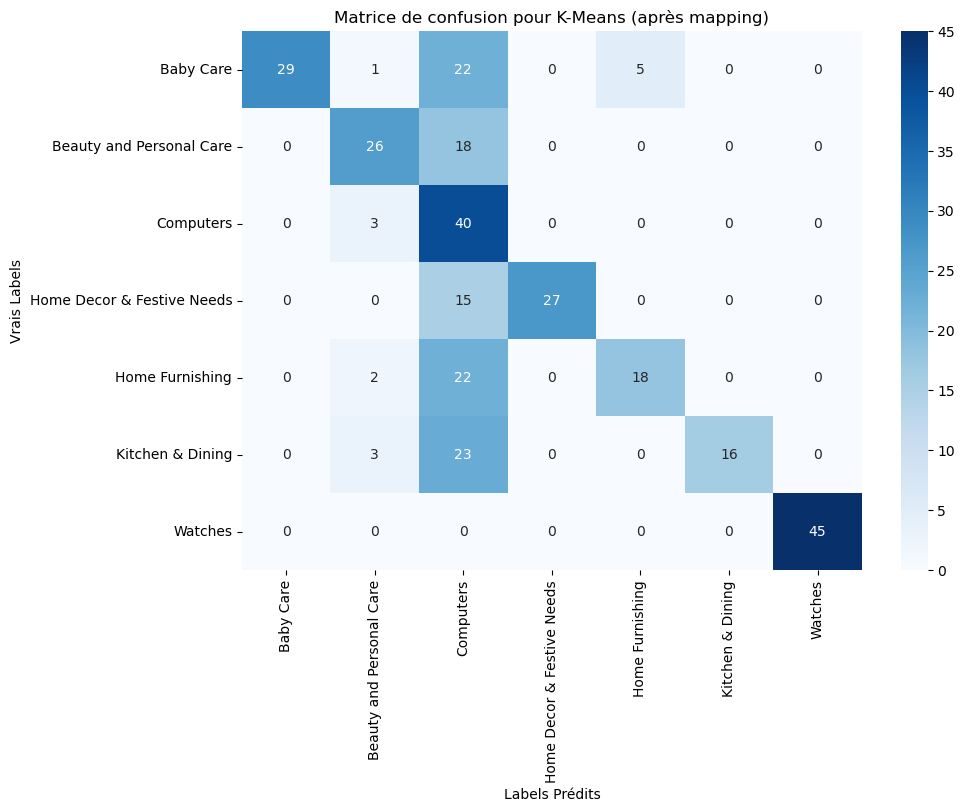

In [61]:
# Générer la matrice de confusion
conf_mat = confusion_matrix(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])

# Utiliser la méthode Hungarian algorithm pour trouver l'appariement optimal
# Inverser les valeurs car la méthode linear_sum_assignment minimise un coût (donc ici on veut maximiser les correspondances)
row_ind, col_ind = linear_sum_assignment(-conf_mat)

# Créer un mapping des clusters vers les vraies catégories
cluster_to_label = {cluster: label_encoder.inverse_transform([label])[0] for cluster, label in zip(col_ind, row_ind)}

print("Cluster to Label Mapping: ", cluster_to_label)

# Remplacer les labels KMeans par les vrais labels
data['kmeans_labels_mapped'] = data['kmeans_labels'].map(cluster_to_label)

# Convertir y_test_encoded en chaînes de caractères
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Générer la nouvelle matrice de confusion
new_conf_mat = confusion_matrix(y_test_labels, data.loc[X_test.index, 'kmeans_labels_mapped'])

# Visualisation de la matrice de confusion corrigée
plt.figure(figsize=(10, 7))
sns.heatmap(new_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion pour K-Means (après mapping)')
plt.xlabel('Labels Prédits')
plt.ylabel('Vrais Labels')
plt.show()

#### TF-IDF

In [62]:
# Modèle KMeans sur les données d'entraînement TF-IDF
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_train_tfidf)

KMeans(n_clusters=7, random_state=42)

In [63]:
# Prédictions avec KMeans sur le jeu de test
data['kmeans_labels'] = np.nan
data.loc[X_test.index, 'kmeans_labels'] = kmeans.predict(X_test_tfidf)

In [64]:
# Encodage des catégories réelles pour le calcul de l'ARI
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [65]:
# Calcul de l'ARI entre les labels KMeans et les catégories réelles
ari_test = adjusted_rand_score(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])
print("ARI sur l'ensemble de test avec la mathode TF-IDF :", ari_test)

ARI sur l'ensemble de test avec la mathode TF-IDF : 0.17096481826294346


#### Matrice de confusion TF IDF

Cluster to Label Mapping:  {1: 'Baby Care', 3: 'Beauty and Personal Care', 6: 'Computers', 0: 'Home Decor & Festive Needs', 5: 'Home Furnishing', 4: 'Kitchen & Dining', 2: 'Watches'}


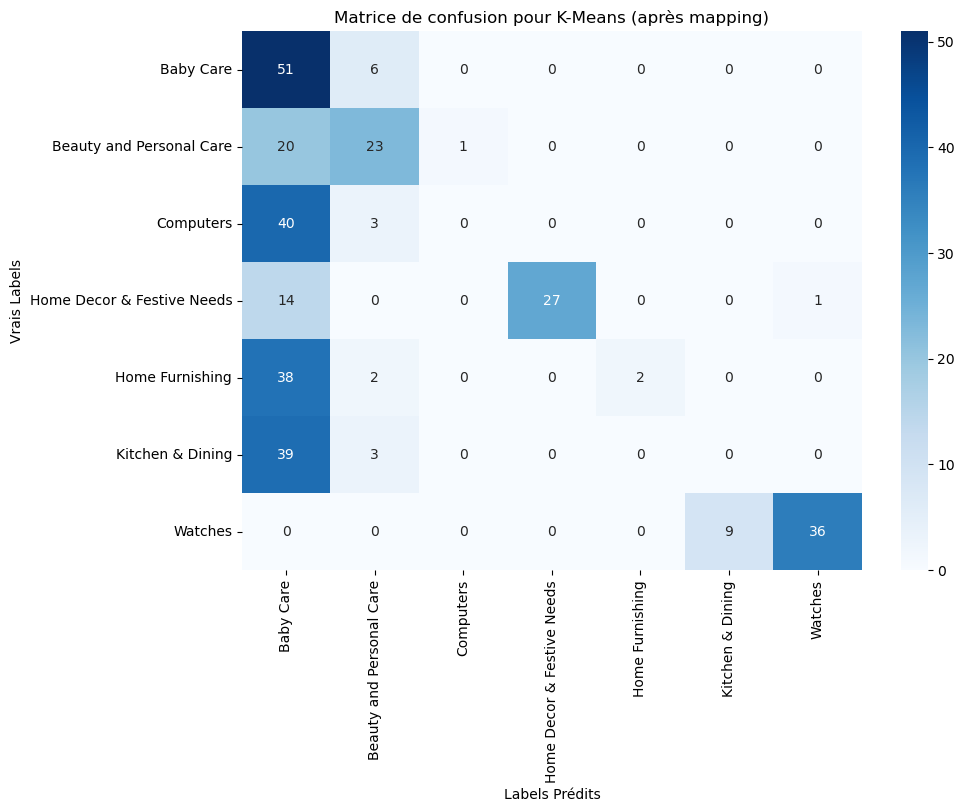

In [66]:
# Générer la matrice de confusion
conf_mat = confusion_matrix(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])

# Utiliser la méthode Hungarian algorithm pour trouver l'appariement optimal
# Inverser les valeurs car la méthode linear_sum_assignment minimise un coût (donc ici on veut maximiser les correspondances)
row_ind, col_ind = linear_sum_assignment(-conf_mat)

# Créer un mapping des clusters vers les vraies catégories
cluster_to_label = {cluster: label_encoder.inverse_transform([label])[0] for cluster, label in zip(col_ind, row_ind)}

print("Cluster to Label Mapping: ", cluster_to_label)

# Remplacer les labels KMeans par les vrais labels
data['kmeans_labels_mapped'] = data['kmeans_labels'].map(cluster_to_label)

# Convertir y_test_encoded en chaînes de caractères
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Générer la nouvelle matrice de confusion
new_conf_mat = confusion_matrix(y_test_labels, data.loc[X_test.index, 'kmeans_labels_mapped'])

# Visualisation de la matrice de confusion corrigée
plt.figure(figsize=(10, 7))
sns.heatmap(new_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion pour K-Means (après mapping)')
plt.xlabel('Labels Prédits')
plt.ylabel('Vrais Labels')
plt.show()

# Word2Vec

In [67]:
# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(data['lemmatized_tokenized_cleaned_description'], 
                                                    data['Categorie'], 
                                                    test_size=0.3, 
                                                    random_state=0)

In [68]:
# Entraînement du modèle Word2Vec sur les noms de produits
model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

In [69]:
# Fonction pour obtenir la moyenne des vecteurs Word2Vec d'une phrase
def get_sentence_vector(sentence, model):
    # Filtrer les mots qui sont dans le vocabulaire Word2Vec
    words_in_vocab = [word for word in sentence if word in model.wv]
    
    # Si aucun mot n'est dans le vocabulaire, retourner un vecteur nul
    if len(words_in_vocab) == 0:
        return np.zeros(model.vector_size)
    
    # Calculer la moyenne des vecteurs des mots dans la phrase
    return np.mean([model.wv[word] for word in words_in_vocab], axis=0)

In [70]:
# Calculer les vecteurs des phrases (moyenne des vecteurs de mots) pour l'ensemble d'entraînement et de test
X_train_vectors = np.array([get_sentence_vector(sentence, model) for sentence in X_train])
X_test_vectors = np.array([get_sentence_vector(sentence, model) for sentence in X_test])

In [71]:
# Clustering KMeans sur les vecteurs Word2Vec
num_clusters = 7  # Nombre de catégories dans ton jeu de données
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_train_vectors)

KMeans(n_clusters=7, random_state=0)

In [72]:
# Prédictions avec KMeans sur l'ensemble de test
data.loc[X_test.index, 'kmeans_labels'] = kmeans.predict(X_test_vectors)

In [73]:
# Encodage des catégories réelles pour le calcul de l'ARI
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [74]:
# Générer la matrice de confusion
conf_mat = confusion_matrix(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])

In [75]:
# Utiliser l'algorithme Hongrois pour mapper les clusters aux vraies catégories
row_ind, col_ind = linear_sum_assignment(-conf_mat)
cluster_to_label = {cluster: label_encoder.inverse_transform([label])[0] for cluster, label in zip(col_ind, row_ind)}

In [76]:
# Remplacer les labels KMeans par les vrais labels
data['kmeans_labels_mapped'] = data['kmeans_labels'].map(cluster_to_label)

In [77]:
# Visualisation de la matrice de confusion corrigée
new_conf_mat = confusion_matrix(y_test, data.loc[X_test.index, 'kmeans_labels_mapped'])

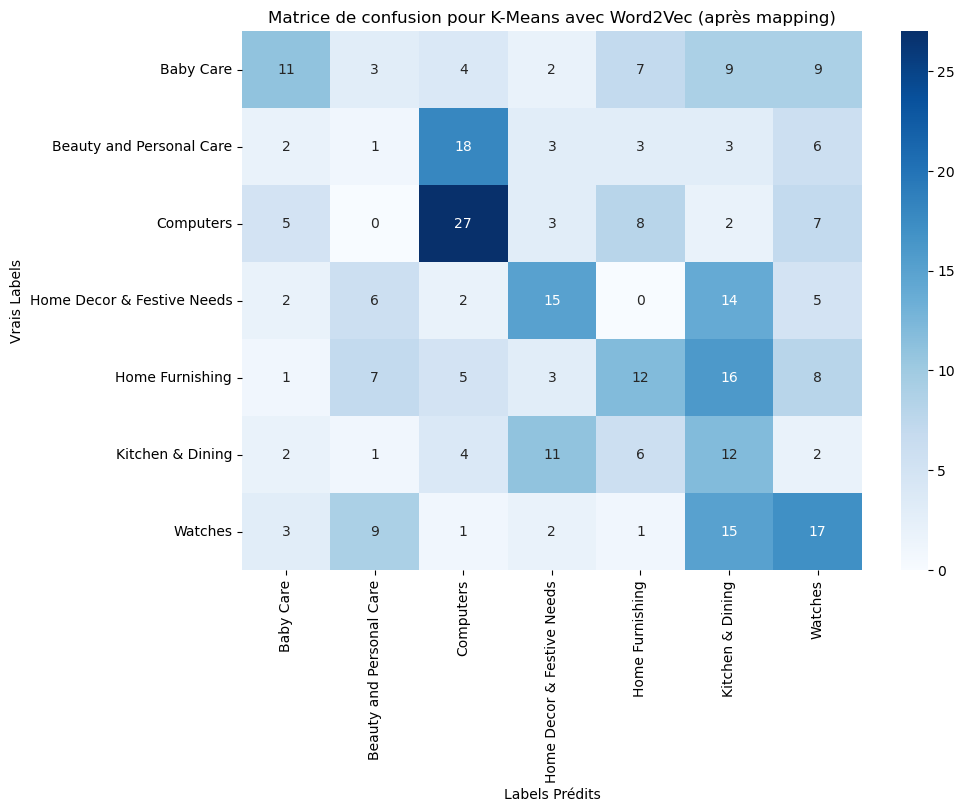

In [78]:
plt.figure(figsize=(10, 7))
sns.heatmap(new_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion pour K-Means avec Word2Vec (après mapping)')
plt.xlabel('Labels Prédits')
plt.ylabel('Vrais Labels')
plt.show()

In [79]:
# Calcul de l'ARI (Adjusted Rand Index)
ari = adjusted_rand_score(y_test, data.loc[X_test.index, 'kmeans_labels_mapped'])
print(f"Adjusted Rand Index (ARI) : {ari}")

Adjusted Rand Index (ARI) : 0.08383608595955135


In [80]:
# Visualisation avec PCA et t-SNE 
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vectors)
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_vectors)

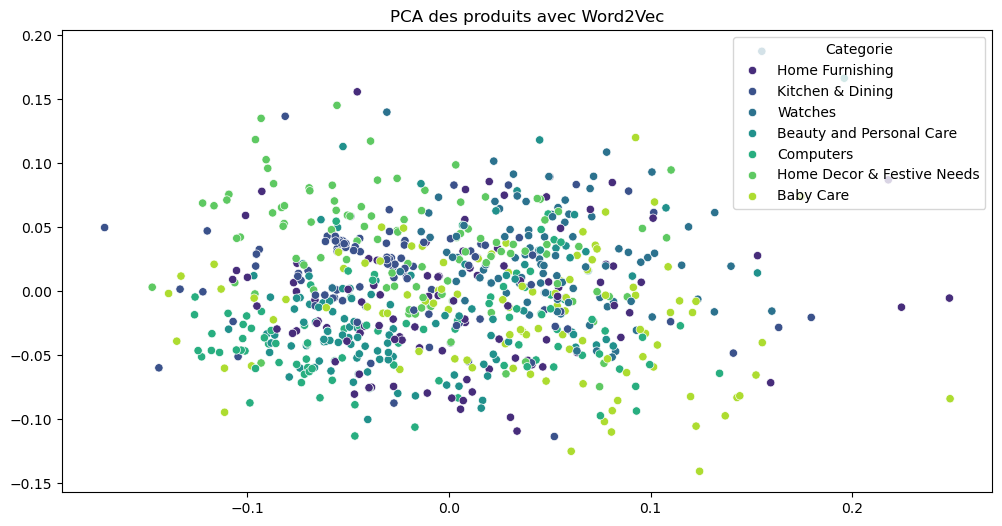

In [81]:
# Visualisation PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis')
plt.title('PCA des produits avec Word2Vec')
plt.show()

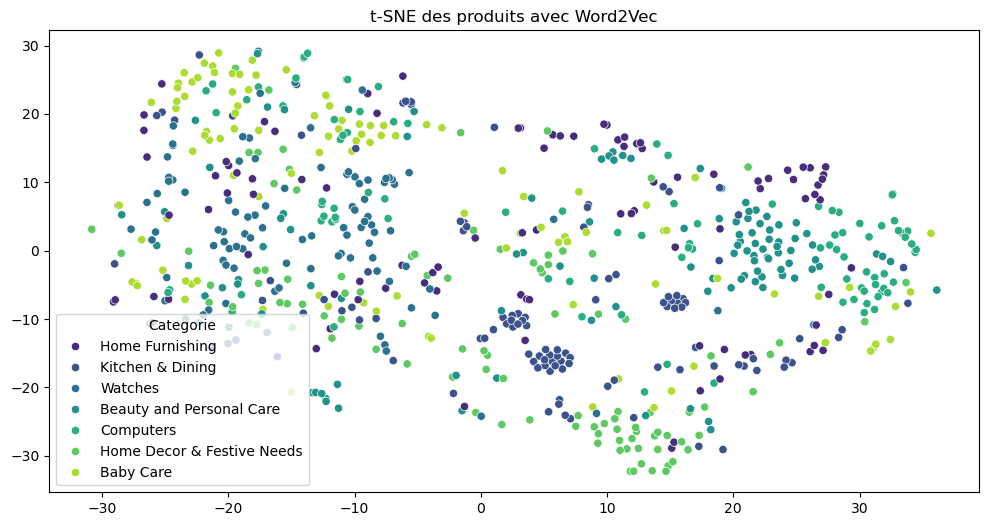

In [82]:
# Visualisation t-SNE
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis')
plt.title('t-SNE des produits avec Word2Vec')
plt.show()

# USE

In [85]:
# Rejoindre les mots tokenisés pour utiliser le modèle USE (qui prend des chaînes de caractères complètes)
data['filtered_product_name'] = data['tokenized_cleaned_description'].apply(lambda x: ' '.join(x))

In [86]:
# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(data['filtered_product_name'], 
                                                    data['Categorie'], 
                                                    test_size=0.3, 
                                                    random_state=0)

In [87]:
# Charger le modèle USE
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

KeyboardInterrupt: 

In [ ]:
# Fonction pour obtenir les embeddings USE
def get_use_embeddings(text_list, model):
    # Convertir la liste de textes en tenseur de chaînes
    embeddings = model(text_list)
    return embeddings.numpy()

In [ ]:
# Calculer les vecteurs USE pour l'ensemble d'entraînement et de test
X_train_vectors = get_use_embeddings(X_train.tolist(), use_model)
X_test_vectors = get_use_embeddings(X_test.tolist(), use_model)

In [ ]:
# Clustering KMeans sur les vecteurs USE
num_clusters = 7  # Nombre de catégories dans ton jeu de données
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_train_vectors)

In [ ]:
# Prédictions avec KMeans sur l'ensemble de test
data.loc[X_test.index, 'kmeans_labels'] = kmeans.predict(X_test_vectors)

In [ ]:
# Encodage des catégories réelles pour le calcul de l'ARI
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
# Générer la matrice de confusion
conf_mat = confusion_matrix(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])

In [ ]:
# Utiliser l'algorithme hongrois pour mapper les clusters aux vraies catégories
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(-conf_mat)
cluster_to_label = {cluster: label_encoder.inverse_transform([label])[0] for cluster, label in zip(col_ind, row_ind)}

In [ ]:
# Remplacer les labels KMeans par les vrais labels
data['kmeans_labels_mapped'] = data['kmeans_labels'].map(cluster_to_label)

In [ ]:
# Visualisation de la matrice de confusion corrigée
new_conf_mat = confusion_matrix(y_test, data.loc[X_test.index, 'kmeans_labels_mapped'])

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(new_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion pour K-Means avec USE (après mapping)')
plt.xlabel('Labels Prédits')
plt.ylabel('Vrais Labels')
plt.show()

In [ ]:
# Calcul de l'ARI (Adjusted Rand Index)
ari = adjusted_rand_score(y_test, data.loc[X_test.index, 'kmeans_labels_mapped'])
print(f"Adjusted Rand Index (ARI) : {ari}")

In [ ]:
# Visualisation avec PCA et t-SNE (si souhaité)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vectors)
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_vectors)

In [ ]:
# Visualisation PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis')
plt.title('PCA des produits avec USE')
plt.show()

In [ ]:
# Visualisation t-SNE
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis')
plt.title('t-SNE des produits avec USE')
plt.show()

# BERT

In [ ]:
# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(data['lemmatized_tokenized_cleaned_description'], 
                                                    data['Categorie'], 
                                                    test_size=0.3, 
                                                    random_state=0)

In [ ]:
# Charger le tokenizer et le modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
# Charger le mini-tokenizer et le mini-modèle BERT
#tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
#model = DistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
# Fonction pour obtenir les embeddings BERT
def get_bert_embeddings(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # On prend la moyenne des embeddings sur les tokens (utilise [CLS] ou la moyenne)
    return torch.mean(outputs.last_hidden_state, dim=1).squeeze().numpy()


In [ ]:
# Calculer les vecteurs BERT pour l'ensemble d'entraînement et de test
X_train_vectors = np.array([get_bert_embeddings(sentence, tokenizer, model) for sentence in X_train])
X_test_vectors = np.array([get_bert_embeddings(sentence, tokenizer, model) for sentence in X_test])

In [ ]:
# Clustering KMeans sur les vecteurs BERT
num_clusters = 7  # Nombre de catégories dans ton jeu de données
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_train_vectors)

In [ ]:
# Prédictions avec KMeans sur l'ensemble de test
data.loc[X_test.index, 'kmeans_labels'] = kmeans.predict(X_test_vectors)

In [ ]:
# Encodage des catégories réelles pour le calcul de l'ARI
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
# Générer la matrice de confusion
conf_mat = confusion_matrix(y_test_encoded, data.loc[X_test.index, 'kmeans_labels'])

In [ ]:
# Utiliser l'algorithme hongrois pour mapper les clusters aux vraies catégories
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(-conf_mat)
cluster_to_label = {cluster: label_encoder.inverse_transform([label])[0] for cluster, label in zip(col_ind, row_ind)}

In [ ]:
# Remplacer les labels KMeans par les vrais labels
data['kmeans_labels_mapped'] = data['kmeans_labels'].map(cluster_to_label)

In [ ]:
# Visualisation de la matrice de confusion corrigée
new_conf_mat = confusion_matrix(y_test, data.loc[X_test.index, 'kmeans_labels_mapped'])

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(new_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion pour K-Means avec BERT (après mapping)')
plt.xlabel('Labels Prédits')
plt.ylabel('Vrais Labels')
plt.show()

In [ ]:
# Calcul de l'ARI (Adjusted Rand Index)
ari = adjusted_rand_score(y_test, data.loc[X_test.index, 'kmeans_labels_mapped'])
print(f"Adjusted Rand Index (ARI) : {ari}")

In [ ]:
# Visualisation avec PCA et t-SNE (si souhaité)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vectors)
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_vectors)

In [ ]:
# Visualisation PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis')
plt.title('PCA des produits avec BERT')
plt.show()

In [ ]:
# Visualisation t-SNE
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis')
plt.title('t-SNE des produits avec BERT')
plt.show()